In [ ]:
pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.4 MB/s eta 0:00:00


In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import mglearn
import matplotlib.pyplot as plt

In [65]:
url = "https://raw.githubusercontent.com/enricochandran/01.-Machine-Learning/refs/heads/main/01.%20Week%201/HeartDisease/HeartDisease.csv"
data = pd.read_csv(url)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [66]:
print("Jumlah data kosong : ")
print(data.isnull().sum())

total_missing = data.isnull().sum().sum()
print("Total missing values:", total_missing)
print("Jumlah data duplikat : ",data.duplicated().sum())

Jumlah data kosong : 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
Total missing values: 6
Jumlah data duplikat :  0


In [67]:
data.fillna(data.median(), inplace=True)

In [68]:
print("Jumlah data kosong : ")
print(data.isnull().sum())

total_missing = data.isnull().sum().sum()
print("Total missing values:", total_missing)
print("Jumlah data duplikat : ",data.duplicated().sum())

Jumlah data kosong : 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
Total missing values: 0
Jumlah data duplikat :  0


In [69]:
X = data.drop(columns=["num"])
y = data['num']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [70]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [71]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
auc_roc = roc_auc_score(y_test_bin, y_pred_proba, average='weighted', multi_class='ovr')

print(f'Akurasi: {accuracy}')
print(f'Presisi: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'AUC: {roc_auc}')

Akurasi: 0.6065573770491803
Presisi: 0.5617190961453256
Recall: 0.6065573770491803
F1-Score: 0.5821233411397346
AUC: 0.9089147286821706


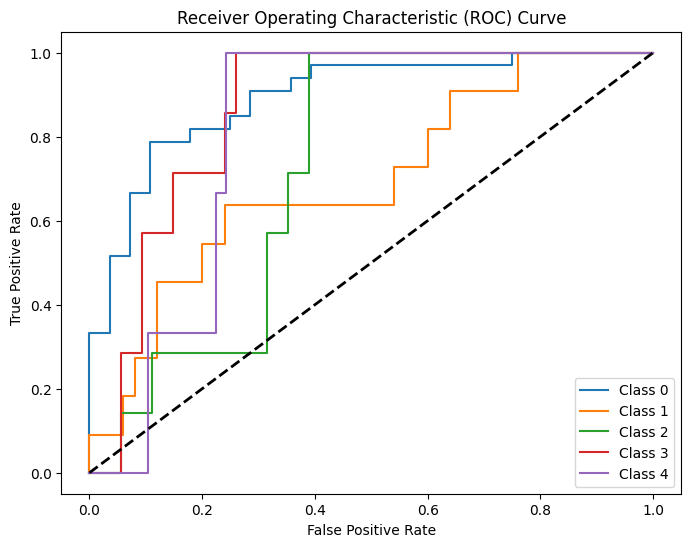

In [72]:
plt.figure(figsize=(8, 6))
for i in range(5):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i}')

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


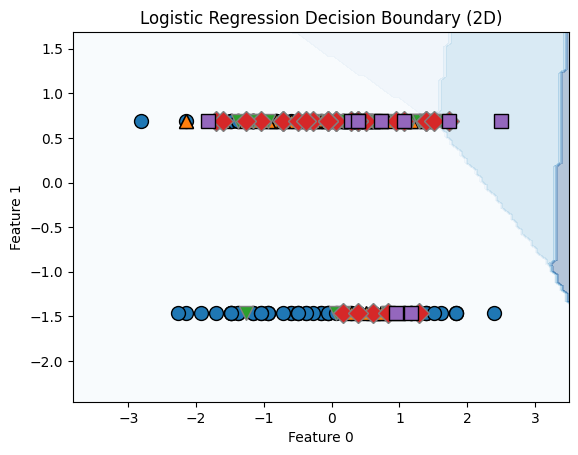

In [73]:
X_train_2d = X_train[:, :2]

model_2d = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_2d.fit(X_train_2d, y_train)

xx, yy = np.meshgrid(np.linspace(X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1, 100),
                     np.linspace(X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1, 100))

Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='Blues')
mglearn.discrete_scatter(X_train_2d[:, 0], X_train_2d[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Logistic Regression Decision Boundary (2D)")
plt.show()

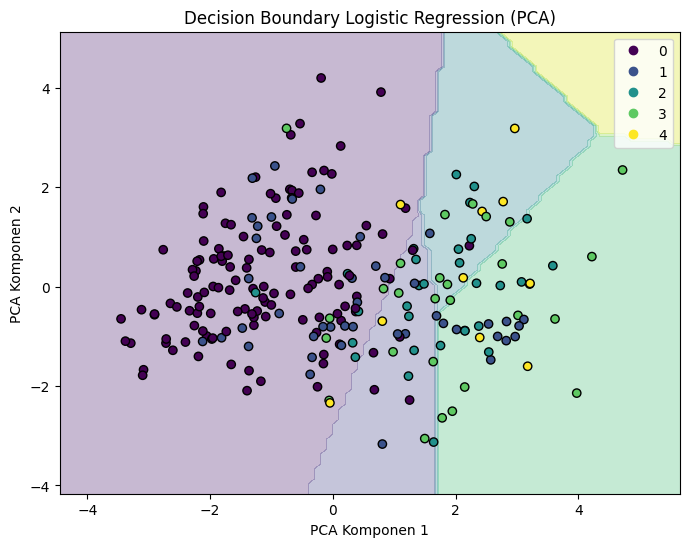

In [75]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train) # Change X_train_scaled to X_train
X_test_pca = pca.transform(X_test) # Change X_test_scaled to X_test

model_pca = LogisticRegression(max_iter=1000, random_state=42)
model_pca.fit(X_train_pca, y_train)

plt.figure(figsize=(8, 6))

x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model_pca.predict(np.c_[XX.ravel(), YY.ravel()])

Z = Z.reshape(XX.shape)

plt.contourf(XX, YY, Z, alpha=0.3, cmap="viridis")

scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap="viridis", edgecolor='k')

labels = np.unique(y_train).tolist()
plt.legend(handles=scatter.legend_elements()[0], labels=labels)
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.title("Decision Boundary Logistic Regression (PCA)")

plt.show()

# **1. Accuracy (Akurasi)**
Accuracy mengukur seberapa sering model melakukan prediksi yang benar (baik benar positif maupun benar negatif) dibandingkan dengan total prediksi.

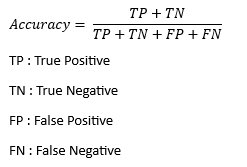

# **2. Precision (Presisi)**
Precision mengukur seberapa akurat model dalam memprediksi kelas positif. Ini adalah rasio prediksi benar positif (True Positives) terhadap semua prediksi positif (True Positives + False Positives).

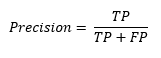

# **3. Recall (Sensitivity atau True Positive Rate)**
Recall mengukur seberapa baik model dapat mengidentifikasi semua instance positif. Ini adalah rasio prediksi benar positif (True Positives) terhadap semua instance positif yang sebenarnya (True Positives + False Negatives).

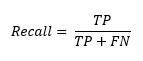

# **4. F1-Score**
F1-Score adalah harmonic mean dari Precision dan Recall. Ini memberikan keseimbangan antara Precision dan Recall.

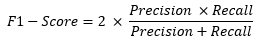

# **5. AUC-ROC (Area Under the Receiver Operating Characteristic Curve)**
AUC-ROC adalah metrik yang mengukur performa model klasifikasi dengan memplot True Positive Rate (TPR) terhadap False Positive Rate (FPR) pada berbagai threshold.

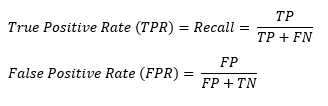

AUC adalah area di bawah kurva ROC. Nilainya berkisar antara 0 dan 1:
*   AUC = 1: Model sempurna.
*   AUC = 0.5: Model tidak lebih baik dari tebakan acak.
*   AUC < 0.5: Model performanya buruk.